# LOADING MODULES AND DATA SETS

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math
import re

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold , GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import eli5

import xgboost as xgbs
%matplotlib inline

In [2]:
data_train = r'/Users/Humza Ali/Documents/Data/Machine Learning/Project 3/counterfeit_train.csv'
ct_train = pd.read_csv(data_train)

In [3]:
ct_train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
data_test = r'/Users/Humza Ali/Documents/Data/Machine Learning/Project 3/counterfeit_test.csv'
ct_test = pd.read_csv(data_test)

In [5]:
ct_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small


# BIVARIATE ANALYSIS AND FEATURE ENGINEERING (EDA)

In [6]:
ct_train.shape,ct_test.shape

((6818, 12), (1705, 11))

In [7]:
ct_train.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
Counterfeit_Sales      float64
dtype: object

In [8]:
ct_test.dtypes

Medicine_ID             object
Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level         object
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
dtype: object

In [9]:
ct_train.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [10]:
ct_train['DistArea_ID'].value_counts()

Area017    760
Area013    749
Area046    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64

In [11]:
ct_train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [12]:
ct_test.isnull().sum()

Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64

In [13]:
ct_train["Medicine_Type"].value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [14]:
ct_train['Area_Type'].value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [15]:
ct_train["Area_City_Type"].value_counts()

Tier 3    2655
Tier 2    2244
Tier 1    1919
Name: Area_City_Type, dtype: int64

In [16]:
ct_train["Area_dist_level"].value_counts()

Medium     2203
Unknown    1938
Small      1928
High        749
Name: Area_dist_level, dtype: int64

In [17]:
ct_train['SidEffect_Level'].value_counts()

mild        4434
critical    2384
Name: SidEffect_Level, dtype: int64

# TRAIN TEST SPLIT

In [18]:
x_train,x_test = train_test_split(ct_train,test_size =0.2, random_state = 1)

In [19]:
x_train1 = x_train.drop(["Counterfeit_Sales","Medicine_ID"],1)
y_train1 = x_train["Counterfeit_Sales"]

In [20]:
x_test1 = x_test.drop(["Counterfeit_Sales",'Medicine_ID'],1)
y_test1 = x_test["Counterfeit_Sales"]

In [21]:
x_train1.shape,y_train1.shape

((5454, 10), (5454,))

In [22]:
x_test1.shape,y_test1.shape

((1364, 10), (1364,))

# CREATING MODEL TRANSFORMER AND PIPELINES

In [23]:
num_col = x_train1.select_dtypes(np.number).columns

In [24]:
char_col = x_train1.select_dtypes(object).columns

In [25]:
num_col, char_col

(Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
        'Availability_rating'],
       dtype='object'),
 Index(['DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_Type',
        'Area_City_Type', 'Area_dist_level'],
       dtype='object'))

In [26]:
pipe_num = make_pipeline(SimpleImputer(strategy = "median"),StandardScaler())
pipe_char=make_pipeline(OneHotEncoder(handle_unknown="ignore"))

In [27]:
ctrans = make_column_transformer((pipe_num,num_col),(pipe_char,char_col))

In [28]:
ctrans.fit_transform(x_train1)

<5454x43 sparse matrix of type '<class 'numpy.float64'>'
	with 54540 stored elements in Compressed Sparse Row format>

In [29]:
ctrans.transform(ct_test)

<1705x43 sparse matrix of type '<class 'numpy.float64'>'
	with 17050 stored elements in Compressed Sparse Row format>

# LINEAR REGRESSION

In [30]:
lm = LinearRegression()

In [31]:
pipe = make_pipeline(ctrans,lm)

In [32]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_T

In [33]:
pipe.fit(x_train1,y_train1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_T

In [34]:
train_pred=pipe.predict(x_train1)
test_pred=pipe.predict(x_test1)

In [35]:
y_train1.head()

2490    1039.7936
5270    2523.8618
82       302.0872
3960    2757.5576
2362    2965.2872
Name: Counterfeit_Sales, dtype: float64

# MEAN ABSOLUTE ERROR CALCULATION

In [36]:
mean_absolute_error(y_train1,train_pred)

832.7751434946088

In [37]:
mean_absolute_error(y_test1,test_pred)

796.5293562487121

In [38]:
Score = 1-(mean_absolute_error(y_test1,test_pred)/1660)

In [39]:
Score

0.5201630384043903

# PREDICTION ON COMPLETE TEST DATA & SUBMISSION

In [40]:
pipe.predict(ct_test)

array([2776.28420375, 3917.82271716, 1467.08533483, ..., 2919.48190112,
       3876.55555748, 3705.16951856])

In [41]:
final_test_predict = pipe.predict(ct_test)

In [42]:
len(final_test_predict)

1705

In [43]:
submission=pd.DataFrame(data=final_test_predict)

In [44]:
submission.columns = ["Counterfeit_Sales"]

In [45]:
submission["Medicine_ID"]=ct_test.Medicine_ID

In [46]:
submission.head()

,Counterfeit_Sales,Medicine_ID
0,2776.284204,HLZ81
1,3917.822717,ECE94
2,1467.085335,SAD14
3,180.150098,EQV63
4,-105.532408,AIR10


In [47]:
submission=submission[["Medicine_ID","Counterfeit_Sales"]]

In [48]:
submission=submission.to_csv("submission_3.csv",index=False) # DOn't use this it will show low grade score

In [49]:
ct_train["Counterfeit_Sales"].sort_values(ascending = True)

5437      146.2900
2943      146.2900
5664      146.9558
3803      147.6216
4031      148.2874
           ...    
5769    10419.5840
502     11106.6896
5999    11558.1020
2128    12230.5600
2743    13199.9648
Name: Counterfeit_Sales, Length: 6818, dtype: float64

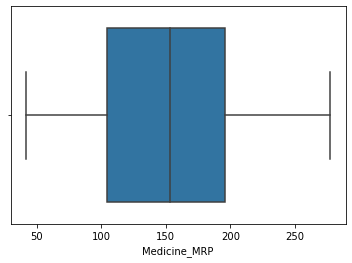

In [50]:
sns.boxplot(x=ct_train.Medicine_MRP) #No Outlier for quiz question no 9

# QUIZ

In [51]:
# Q1. You have been given the data for sales of counterfiet medicines. What is the problem you are trying to address?
#Ans. C

#Q2. Number of columns containing missing values in the training dataset. (Please write the number instead of a word)
#Ans. 1

#Q3. Considering the training dataset, the number of missing values in the column with missing data is 1166.
#Ans. True

#Q4. How many unique medicine types are present in the training dataset?
#Ans. 16

#Q5. Which area type has the highest number of counterfiet drugs?
#Ans. Downtown

#Q6. Which medicine type has the lowest count in the training dataset?
#Ans. Antiviral

#Q7. What is the lowest value of counterfiet sales in the training dataset?
#Ans. around 146$

#Q8. When we are handling missing data, is replacing the missing values with mean the only option?
#Ans. No

#Q9. 'Medicine_MRP' column does not contain any outliers.
#Ans. True

#Q10. Which of the following algorithms cannot be used to model continuous response variable?
#Ans. Logistic regression algorithms cannot be used to model continuous response variable.

# XG BOOST

In [52]:
strings="xgb__"
parameters={'n_estimators':[40,60,80,100],
            'max_depth':range(2,10,1),
            'learning_rate':[.1,.01,.05],
            'reg_lambda':[.1,.01,1,10],
            'reg_alpha':[.1,.01,1,10]}

In [53]:
parameters.items()

dict_items([('n_estimators', [40, 60, 80, 100]), ('max_depth', range(2, 10)), ('learning_rate', [0.1, 0.01, 0.05]), ('reg_lambda', [0.1, 0.01, 1, 10]), ('reg_alpha', [0.1, 0.01, 1, 10])])

In [59]:
xgb_params = {strings+k:v for k,v in parameters.items()}
xgb_params

{'xgb__n_estimators': [40, 60, 80, 100],
 'xgb__max_depth': range(2, 10),
 'xgb__learning_rate': [0.1, 0.01, 0.05],
 'xgb__reg_lambda': [0.1, 0.01, 1, 10],
 'xgb__reg_alpha': [0.1, 0.01, 1, 10]}

In [60]:
xgb = xgbs.XGBRegressor()
pipe=Pipeline([('columntransfer',ctrans),('xgb',xgb)])

In [63]:
grid=RandomizedSearchCV(pipe,xgb_params,cv=5,scoring="neg_mean_absolute_error")

In [64]:
grid

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransfer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               Index(['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP',
       'Availability_rating'],
      dtype='object')),
                                                                              ('pipeline-2',
                                                       

In [65]:
grid.fit(x_train1,y_train1);

[16:49:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:49:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [66]:
grid.predict(x_train1)

array([ 819.935  , 2378.1667 ,  643.2753 , ..., 1759.8557 ,  629.53076,
       5747.8867 ], dtype=float32)

In [67]:
grid.predict(ct_test)

array([2428.8047, 3974.5215, 1566.6576, ..., 2943.3225, 3519.263 ,
       3912.735 ], dtype=float32)

In [68]:
pred_final = grid.predict(ct_test)

In [69]:
mea = mean_absolute_error(y_test1,grid.predict(x_test1))

In [70]:
mea

716.2355694092244

In [71]:
Score = 1-(mea/1660)

In [72]:
Score

0.5685327895125154

In [73]:
pred_final=pd.DataFrame(pred_final)

In [74]:
pred_final.columns=["Counterfeit_Sales"]

In [75]:
pred_final["Medicine_ID"]=ct_test.Medicine_ID

In [76]:
pred_final=pred_final[["Medicine_ID","Counterfeit_Sales"]]

In [77]:
pred_final.head()

,Medicine_ID,Counterfeit_Sales
0,HLZ81,2428.804688
1,ECE94,3974.521484
2,SAD14,1566.657593
3,EQV63,465.721802
4,AIR10,522.145874


In [78]:
ct_test.shape,pred_final.shape

((1705, 11), (1705, 2))

In [79]:
pred_final=pred_final.to_csv("Abdeali_Project3.csv",index=False) # Please use this for Uploading to class project for grading

In [80]:
grid.best_params_

{'xgb__reg_lambda': 10,
 'xgb__reg_alpha': 10,
 'xgb__n_estimators': 100,
 'xgb__max_depth': 3,
 'xgb__learning_rate': 0.05}

# Random Forest